In [172]:
using Revise
using Chemistry
using PyPlot

cd("/Users/bach/OneDrive - Politechnika Warszawska/projects/2019/iskra")
include("problem/configuration.jl")
include("problem/units_and_constants.jl")
include("Chemistry/src/biagi71.jl")
include("Chemistry/src/phelps.jl")
nothing

In [268]:
config = Config()

using ParticleInCell

He  = FluidSpecies("He", 1.0, 0qe, 6.64647645970479e-27, zeros(1,1), 300.0K)
e   = KineticSpecies{2,3}("e-",  20_000)
iHe = KineticSpecies{2,3}("He+", 20_000)
e.q, e.m = -1qe, 1me
iHe.q, iHe.m = +1qe, 6.64647645970479e-27

electron = mcc(@reactions begin
    σ₁, e + He --> e + He
    σ₂, e + He --> e + He, Chemistry.MCC.Excitation(19.82eV)
    σ₃, e + He --> e + He, Chemistry.MCC.Excitation(20.61eV)
    σ₄, e + He --> e + e + iHe, Chemistry.MCC.Ionization(24.587eV)
end)

ion = mcc(@reactions begin
    σₑ₁, iHe + He --> iHe + He, Chemistry.MCC.ElasticIsotropic()
    σₑ₂, iHe + He --> iHe + He, Chemistry.MCC.ElasticBackward()
end)
 

typeof.(electron.collisions)

4-element Array{DataType,1}:
 Chemistry.MCC.Collision{Chemistry.MCC.ElasticIsotropic}
 Chemistry.MCC.Collision{Chemistry.MCC.Excitation}      
 Chemistry.MCC.Collision{Chemistry.MCC.Excitation}      
 Chemistry.MCC.Collision{Chemistry.MCC.Ionization}      

In [269]:
sol = 299_792_458u"m/s" 
mass = 510_998.9500015u"eV"/sol^2
energy = 0.1u"eV"
velocity = sqrt(2energy/mass)

187553.72620952097 m s^-1

U: 0.816959794400085
i: 4
U > (i/N) - Pᵢ: 

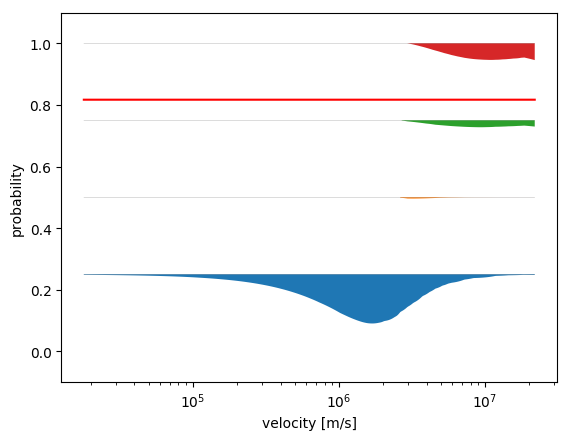

null-collision


In [270]:
vmin, vmax = 18_000, 22_000_000
timestep = 1.8436578171091445e-9
density = 9.64e20

ν = vmin:1_000:vmax
Δt = timestep
n₀ = density
N = 4
U = rand()
i = floor(Int64, N*U + 1)
println("U: ", U)
println("i: ", i)

for (j, collision) in enumerate(electron.collisions)
	mᵢ = collision.source.m / 1.602176634e-19
	σᵢ = collision.rate
	εᵢ = 0.5 .* mᵢ .* ν .^ 2
	Pᵢ = n₀ .* ν .* σᵢ.(εᵢ) .* Δt
    #loglog(ν, n₀ .* ν .* σᵢ.(εᵢ) .* Δt)
    fill_between(ν, j/N, j/N .- Pᵢ)
    semilogx(ν, j/N .+ zero(ν), "k", linewidth=0.1)
    if i == j
      hit = U > i/N - maximum(Pᵢ)
      println("U > (i/N) - Pᵢ: ", hit ? collision : "null-collision")
    end
end

semilogx(ν, U .+ zero(ν), "r")
ylim(-0.1, +1.1)
xlabel("velocity [m/s]")
ylabel("probability")
nothing


In [271]:
sol = 299_792_458u"m/s" 
mass = 4.002602 * 931_494_028.23u"eV"/sol^2
energy = 10_000u"eV"
velocity = sqrt(2energy/mass)
velocity
#uconvert(u"kg", mass), 4.1484043136437294e-8 * 1.602176634e-19

694343.635848776 m s^-1

U: 0.9992016430443424
i: 2
U > (i/N) - Pᵢ: 

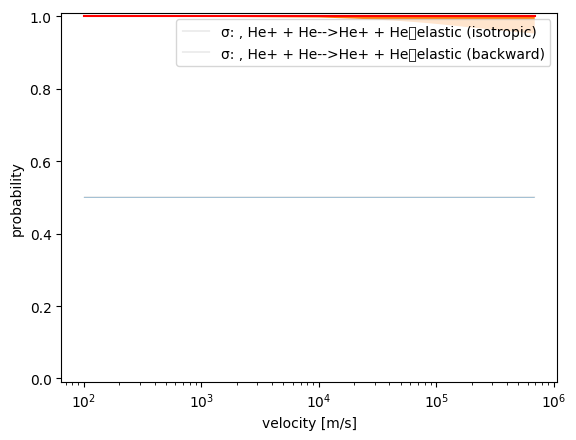

σ: , He+ + He-->He+ + He	elastic (backward)


In [319]:
vmin, vmax = 100, 700_000
timestep = 1.8436578171091445e-9#10
density = 9.64e20

ν = vmin:10_000:vmax
Δt = timestep
n₀ = density
N = 2
U = rand()
i = floor(Int64, N*U + 1)
println("U: ", U)
println("i: ", i)

for (j, collision) in enumerate(ion.collisions)
	mᵢ = collision.source.m / 1.602176634e-19
	σᵢ = collision.rate
	εᵢ = 0.5 .* mᵢ .* ν .^ 2
	Pᵢ = n₀ .* ν .* σᵢ.(εᵢ) .* Δt
    #loglog(ν, σᵢ.(εᵢ) .* Δt)
    fill_between(ν, j/N, j/N .- Pᵢ)
    semilogx(ν, j/N .+ zero(ν), "k", linewidth=0.1)
    if i == j
      hit = U > i/N - maximum(Pᵢ)
      println("U > (i/N) - Pᵢ: ", hit ? collision : "null-collision")
    end
end
legend(string.(ion.collisions))
semilogx(ν, U .+ zero(ν), "r")
ylim(-0.01, +1.01)
xlabel("velocity [m/s]")
ylabel("probability")
nothing
